In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns


In [3]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

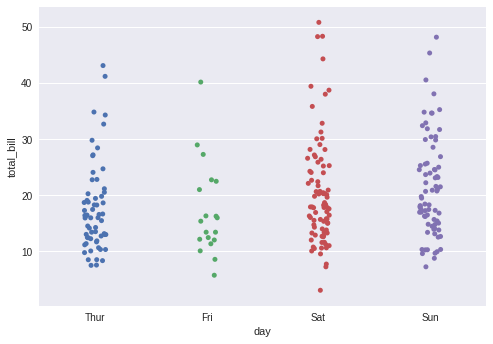

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


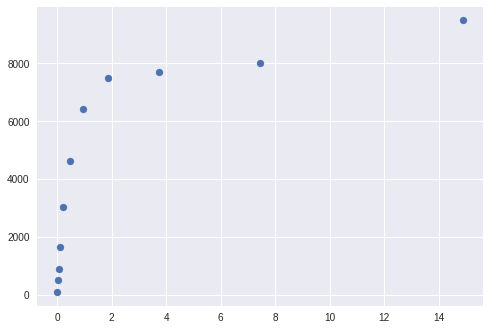

In [38]:
y = np.array([99, 512, 892, 1652, 3034, 4614,6404,7496, 7680, 8010, 9474])
x = np.array([0.000001, 0.03, 0.06, 0.12, 0.23, 0.47, 0.93, 1.86, 3.72, 7.44, 14.88])
plt.scatter(x,y)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


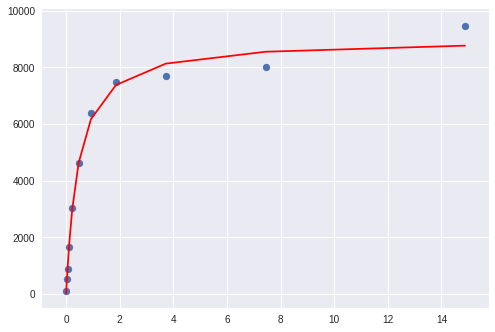

In [52]:
from scipy.optimize import curve_fit
import numpy as np

def logistic4(x, A, B, C, D):
    """4PL lgoistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

popt, pcov = curve_fit(logistic4, x, y)
popt
#curve_fit(logistic4,x,1/y)
# plotting
## is there way to more smooth line?
plt.plot(x, logistic4(x, *popt), 'r-')
plt.scatter(x,y)

In [48]:
popt

array([  1.21739655e+01,   1.06617148e+00,   4.43858816e-01,
         8.97318643e+03])

In [54]:
from scipy.optimize import leastsq

def logistic4(x, A, B, C, D):
    """4PL lgoistic equation."""
    return ((A-D)/(1.0+((x/C)**B))) + D

def residuals(p, y, x):
    """Deviations of data from fitted 4PL curve"""
    A,B,C,D = p
    err = y-logistic4(x, A, B, C, D)
    return err

def peval(x, p):
    """Evaluated value at x with current parameters."""
    A,B,C,D = p
    return logistic4(x, A, B, C, D)

# Initial guess for parameters
p0 = [0, 1, 1, 1]

# Fit equation using least squares optimization
plsq = leastsq(residuals, p0, args=(y, x))
plsq

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in power
  """


(array([  1.21642703e+01,   1.06616089e+00,   4.43861503e-01,
          8.97321017e+03]), 1)